<a href="https://colab.research.google.com/github/JeanAlvesR/CursoMachineLearning/blob/master/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de Decisão

## Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

## Risco de Crédito

In [2]:
with open('risco_credito.pkl','rb') as f:
  x_risk, y_risk = pickle.load(f)

In [3]:
from sklearn.tree import DecisionTreeClassifier
credit_risk_tree = DecisionTreeClassifier(criterion='entropy')
credit_risk_tree.fit(x_risk, y_risk)

DecisionTreeClassifier(criterion='entropy')

In [4]:
credit_risk_tree.feature_importances_

array([0.48015651, 0.06408636, 0.03885431, 0.41690281])

In [5]:
from sklearn import tree

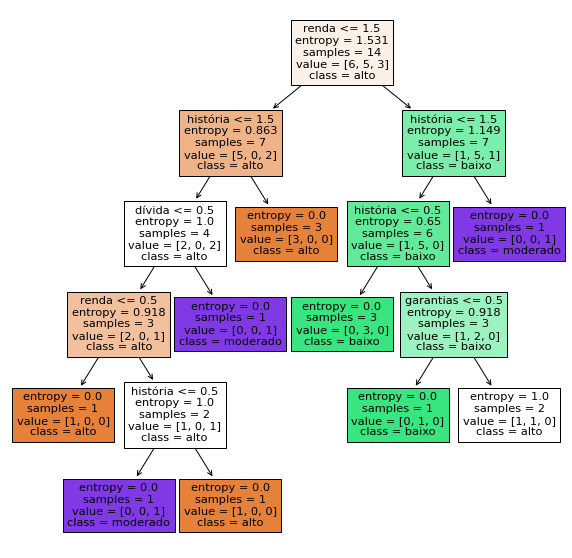

In [6]:
previsores = ['história','dívida','garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
tree.plot_tree(credit_risk_tree, feature_names=previsores, class_names=credit_risk_tree.classes_,filled=True);

In [7]:
# história boa, dívida alta, garantias nenhuma, renda>35
# história ruim, dívida alta, garantias adqueada, renda<15
previsoes = credit_risk_tree.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

## Base Crédito - 98.2% accuracy

In [8]:
with open('credit.pkl','rb') as f:
  x_credit_train, y_credit_train, x_credit_test, y_credit_test = pickle.load(f)

(500, 3)

In [12]:
credit_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
credit_tree.fit(x_credit_train, y_credit_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [13]:
previsoes = credit_tree.predict(x_credit_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [17]:
accuracy_score(y_credit_test, previsoes)

0.982

0.982

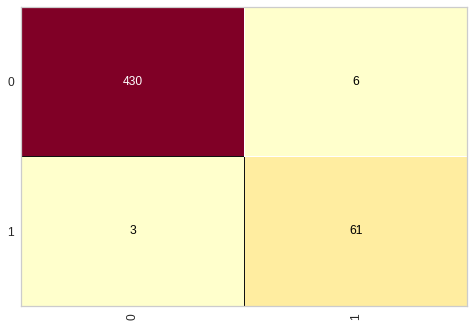

In [18]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(credit_tree)
cm.fit(x_credit_train, y_credit_train)
cm.score(x_credit_test, y_credit_test)

In [19]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



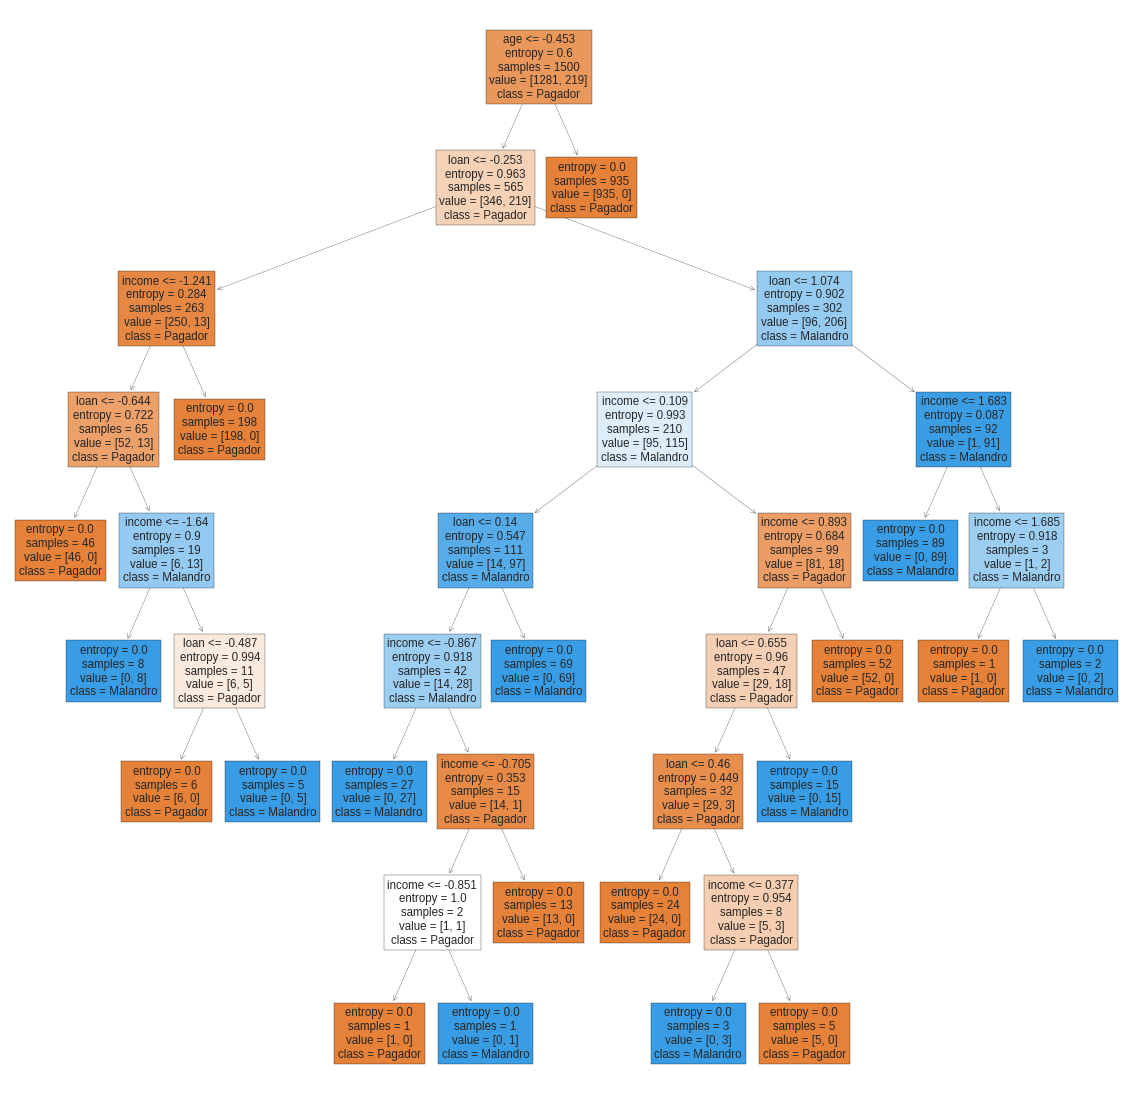

In [26]:
import matplotlib.pyplot as plt
previsores = ['income','age','loan']
figura, eixos = plt.subplots(nrows=1, ncols=1,figsize=(20,20))
tree.plot_tree(credit_tree, feature_names=previsores, class_names=['Pagador','Malandro'],filled=True);
figura.savefig('credit_tree.png')

## Base Census

In [27]:
with open('census.pkl','rb') as f:
  X_census_train, y_census_train, X_census_test, y_census_test = pickle.load(f)

In [28]:
X_census_train.shape, X_census_test.shape

((27676, 108), (4885, 108))

In [31]:
y_census_train.shape, y_census_test.shape

((27676,), (4885,))

In [34]:
census_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
census_tree.fit(X_census_train, y_census_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
previsoes = census_tree.predict(X_census_test)

In [39]:
accuracy_score(y_census_test, previsoes)

0.8104401228249745

0.8104401228249745

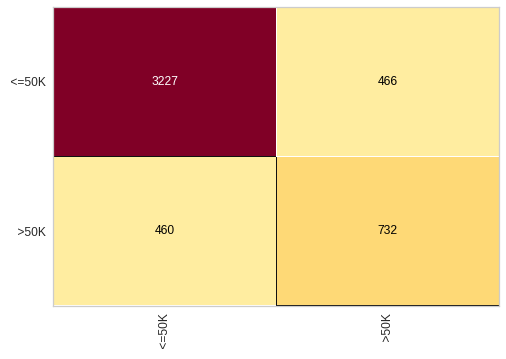

In [38]:
cm = ConfusionMatrix(census_tree)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)

In [40]:
print(classification_report(y_census_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

